#Customer Churn Analysis by Keras

###載入資料集

In [15]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0)
df.head() #顯示5(預設)筆資料

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


###數據清理

In [16]:
# 檢查每個欄位是否有缺失值
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [17]:
# 要是數值型資料才能作分析
# 去除前三欄
df = df.iloc[:,3:] #根據位置去取資料[列,欄]
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [18]:
# 顯示資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             3333 non-null   object 
 1   voice_mail_plan                3333 non-null   object 
 2   number_vmail_messages          3333 non-null   int64  
 3   total_day_minutes              3333 non-null   float64
 4   total_day_calls                3333 non-null   int64  
 5   total_day_charge               3333 non-null   float64
 6   total_eve_minutes              3333 non-null   float64
 7   total_eve_calls                3333 non-null   int64  
 8   total_eve_charge               3333 non-null   float64
 9   total_night_minutes            3333 non-null   float64
 10  total_night_calls              3333 non-null   int64  
 11  total_night_charge             3333 non-null   float64
 12  total_intl_minutes             3333 non-null   f

In [19]:
# 把object欄位列出，要做轉換
df.select_dtypes('object').head()

,international_plan,voice_mail_plan,churn
1,no,yes,no
2,no,yes,no
3,no,no,no
4,yes,no,no
5,yes,no,no


In [20]:
df['international_plan'].unique() # 判別這欄裡的資訊

array(['no', 'yes'], dtype=object)

In [21]:
df['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [22]:
df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
# 轉換成數字，yes=1, no=0
df['international_plan'] = df['international_plan'].replace({'yes':1, 'no':0})

In [24]:
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes':1, 'no':0})

In [25]:
df['churn'] = df['churn'].replace({'yes':1, 'no':0})

In [26]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [27]:
# 所有的欄列位都用除了最後一欄列
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
# 3333筆，16個欄位
X.shape

(3333, 16)

In [29]:
y.shape

(3333,)

In [30]:
# 建模前先把資料切成訓練與測試資料集
# 用1/3的資料當測試資料集，剩下隨機切(42是習慣)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 42)

###數據標準化

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X) # 要根據訓練資料集得出之標準去做轉換

In [32]:
train_X.shape

(2233, 16)

In [33]:
test_X.shape

(1100, 16)

###訓練模型 by Keras

In [34]:
# 建模前，要先將資料做清理(讀取->轉換->標轉化)
# 16 -> 8 (2層) -> 1 (sigmoid)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = (16,)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
# 查看模型參數
# 16*8+8=136
# 8*8+8=72
# 8*1+1=9
# 總共使用217個參數
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


###編譯

In [37]:
model.compile(optimizer='sgd',
       loss='binary_crossentropy', # 二元
       metrics=['accuracy'])

In [38]:
history = model.fit(
 train_X, train_y,
 epochs = 100,  # 跑100次
 batch_size = 32, 
 verbose = 0,
 validation_data = (test_X, test_y)   

)

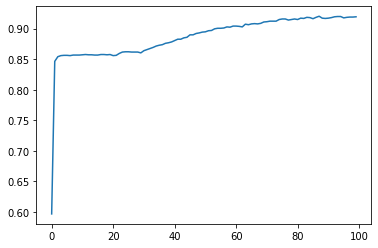

In [40]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

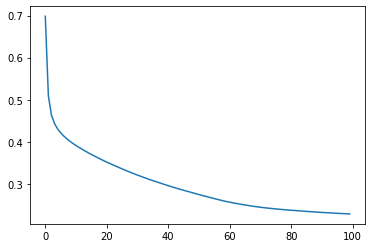

In [41]:
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

###做模型評估

In [42]:
model.evaluate(test_X, test_y)

35/35 [==============================] - 0s 844us/step - loss: 0.2328 - accuracy: 0.9173


[0.2328142523765564, 0.9172727465629578]

In [43]:
model.predict(test_X)

array([[0.02956796],
       [0.00822467],
       [0.44773746],
       ...,
       [0.02937102],
       [0.7896426 ],
       [0.18710628]], dtype=float32)

In [44]:
# 假設 >0.5 判斷客戶會流失
pred_y = (model.predict(test_X) > 0.5).flatten().astype(int)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, pred_y)

0.9172727272727272

In [46]:
test_y.value_counts()

0    940
1    160
Name: churn, dtype: int64

In [47]:
1 - (160 / 1100)

0.8545454545454545

In [48]:
confusion_matrix(test_y, pred_y)

array([[920,  20],
       [ 71,  89]])

In [49]:
# 量化
# 檢視各類別分類效果
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       940
           1       0.82      0.56      0.66       160

    accuracy                           0.92      1100
   macro avg       0.87      0.77      0.81      1100
weighted avg       0.91      0.92      0.91      1100

